### Import Libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import calinski_harabasz_score as chs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
univ=pd.read_csv('..\\may 5 batch codes\\Data Files\\Universities.csv')
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


### Data Understanding

In [3]:
univ.shape

(25, 7)

In [4]:
univ.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [5]:
univ.dtypes

Univ        object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

### Data Preparation

In [6]:
ss=StandardScaler()
scaled_univ=ss.fit_transform(univ.iloc[:,1:])
print(scaled_univ)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

### Find Optimum number of Clustering (Using Elbow Method - by finding wcss/inertia)

In [7]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    clusters=kmeans.fit_predict(scaled_univ)
    wcss.append(kmeans.inertia_)
print('clusters are :',np.unique(clusters))
list(enumerate(wcss))

clusters are : [0 1 2 3 4 5 6 7 8 9]


[(0, 150.0),
 (1, 64.1452839501027),
 (2, 44.53176173145097),
 (3, 33.654341806512235),
 (4, 28.341415217081934),
 (5, 22.672206496052254),
 (6, 18.91299739748178),
 (7, 16.179913894092927),
 (8, 13.161014731247565),
 (9, 11.02525622519605)]

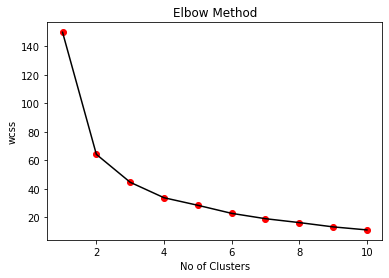

In [8]:
plt.plot(range(1,11),wcss,color='black')
plt.scatter(range(1,11),wcss,color='red')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

#### From above validation technique, we can guess that optimum number of clusters = 3

In [9]:
kmeans_elbow=KMeans(n_clusters=3,random_state=12)
kmeans_elbow.fit(scaled_univ)

KMeans(n_clusters=3, random_state=12)

In [10]:
print(kmeans_elbow.cluster_centers_)

[[ 0.90738779  0.73921344 -0.76914845 -0.76617344  0.97562148  0.61998454]
 [-1.93029211 -1.98148647  1.59348244  1.63857398 -1.23359906 -1.68680366]
 [-0.03711013  0.10608541  0.04570052  0.02843875 -0.32051642  0.09727948]]


In [11]:
kmeans_elbow.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [12]:
univ['Clusters']=kmeans_elbow.labels_
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [13]:
univ[univ['Clusters']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
1,CalTech,1415,100,25,6,63575,81,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
10,MIT,1380,94,30,10,34870,91,0
14,Princeton,1375,91,14,8,30220,95,0
16,Stanford,1360,90,20,12,36450,93,0
24,Yale,1375,95,19,11,43514,96,0


In [14]:
univ[univ['Clusters']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [15]:
univ[univ['Clusters']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,2
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
7,Georgetown,1255,74,24,12,20126,92,2
11,Northwestern,1260,85,39,11,28052,89,2
12,NotreDame,1255,81,42,13,15122,94,2
18,UCBerkeley,1240,95,40,17,15140,78,2
19,UChicago,1290,75,50,13,38380,87,2
20,UMichigan,1180,65,68,16,15470,85,2


In [16]:
univ.groupby('Clusters').agg(['mean']).round(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
Clusters,,,,,,
0,1362.78,90.56,24.33,9.67,41176.89,92.22
1,1061.50,38.75,70.00,19.25,9953.00,71.75
2,1262.50,78.50,40.08,12.83,22858.00,87.58


### Exploring other Validation Techniques

#### Silhouette Score

In [17]:
inertia=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=True)
    y=kmeans.fit_predict(scaled_univ)
    inertia.append(sil(scaled_univ,y))
print('clusters are :',np.unique(y))
list(enumerate(inertia))

clusters are : [0 1 2 3 4 5 6 7 8]


[(0, 0.5398183800851214),
 (1, 0.31257185266905413),
 (2, 0.3296877507696205),
 (3, 0.3065853324233836),
 (4, 0.3052276559590772),
 (5, 0.2840221125483168),
 (6, 0.2677770899828472),
 (7, 0.22953017750788626)]

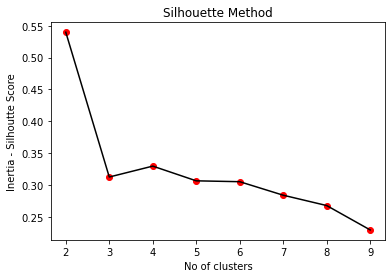

In [18]:
plt.plot(range(2,10),inertia,color="black")
plt.scatter(range(2,10),inertia,color="red")
plt.title('Silhouette Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia - Silhoutte Score')
plt.show()

#### calinski harabasz score

In [19]:
inertia=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=True)
    y=kmeans.fit_predict(scaled_univ)
    inertia.append(chs(scaled_univ,y))
print('clusters are :',np.unique(y))
list(enumerate(inertia))

clusters are : [0 1 2 3 4 5 6 7 8]


[(0, 30.784156644839005),
 (1, 25.940723503840815),
 (2, 24.19954049426162),
 (3, 23.128366273489625),
 (4, 21.845036559532723),
 (5, 21.23404656567426),
 (6, 20.73401499248261),
 (7, 20.71629223685833)]

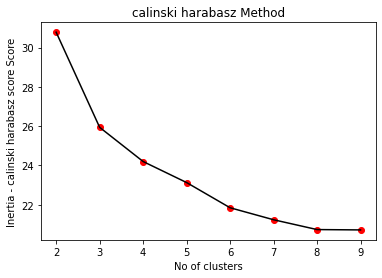

In [20]:
plt.plot(range(2,10),inertia,color="black")
plt.scatter(range(2,10),inertia,color="red")
plt.title('calinski harabasz Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia - calinski harabasz score Score')
plt.show()

### End